# WeatherPy

In [262]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import matplotlib.dates as mdate

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate cities list

In [263]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [264]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | sergeyevka
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | udachnyy
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 | comodoro rivadavia
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | kamiiso
Process

Processing Record 41 of Set 4 | shunyi
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | oxapampa
Processing Record 44 of Set 4 | phan thiet
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | bartica
Processing Record 48 of Set 4 | vanimo
Processing Record 49 of Set 4 | newcastle
Processing Record 50 of Set 4 | cabrera
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | paragominas
Processing Record 4 of Set 5 | arman
Processing Record 5 of Set 5 | san mateo ixtatan
Processing Record 6 of Set 5 | hukuntsi
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | sainte-anne-des-monts
Processing Record 9 of Set 5 | road town
Processing Record 10 of Set 5 | nioro
Processing Record 11 of Set 5 | bantogon
Processing Record 12 of Set 5 | sechura
Processing Record 13 of Set 5 | vallenar
Process

Processing Record 22 of Set 8 | leninskoye
Processing Record 23 of Set 8 | pasighat
Processing Record 24 of Set 8 | guerrero negro
Processing Record 25 of Set 8 | okato
Processing Record 26 of Set 8 | roald
Processing Record 27 of Set 8 | halalo
City not found. Skipping...
Processing Record 28 of Set 8 | kon tum
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | newport
Processing Record 31 of Set 8 | golden
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | novo aripuana
Processing Record 34 of Set 8 | iqaluit
Processing Record 35 of Set 8 | lebowakgomo
Processing Record 36 of Set 8 | sopiste
City not found. Skipping...
Processing Record 37 of Set 8 | zemio
Processing Record 38 of Set 8 | yulara
Processing Record 39 of Set 8 | nikolayevsk-na-amure
Processing Record 40 of Set 8 | kungurtug
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | mandalgovi
Processing Record 43 of Set 8 | aljezur
Processing Record 44 of Set 

Processing Record 9 of Set 12 | vila
Processing Record 10 of Set 12 | moroto
Processing Record 11 of Set 12 | pemangkat
City not found. Skipping...
Processing Record 12 of Set 12 | college
Processing Record 13 of Set 12 | lodja
Processing Record 14 of Set 12 | magui
City not found. Skipping...
Processing Record 15 of Set 12 | xining
Processing Record 16 of Set 12 | akdepe
Processing Record 17 of Set 12 | acajutla
Processing Record 18 of Set 12 | clarence town
Processing Record 19 of Set 12 | chateaubelair
Processing Record 20 of Set 12 | karratha
Processing Record 21 of Set 12 | temir
Processing Record 22 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 23 of Set 12 | asosa
Processing Record 24 of Set 12 | kuching
Processing Record 25 of Set 12 | tiznit
Processing Record 26 of Set 12 | mattru
Processing Record 27 of Set 12 | beringovskiy
Processing Record 28 of Set 12 | kenora
Processing Record 29 of Set 12 | nabire
Processing Record 30 of Set 12 | flores
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [265]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [266]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,21,PF,1569808031,80,-9.80,-139.03,79.25,20.27
1,Sao Filipe,100,CV,1569808120,83,14.90,-24.50,77.81,16.75
2,Bredasdorp,51,ZA,1569808000,87,-34.53,20.04,52.00,6.93
3,Sergeyevka,11,KZ,1569808207,79,53.88,67.42,34.07,9.51
4,Puerto Ayora,17,EC,1569808027,87,-0.74,-90.35,68.00,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

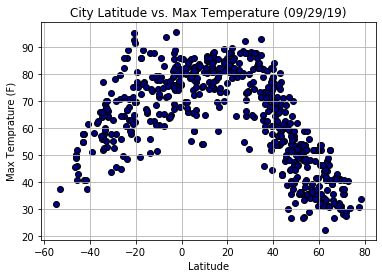

In [267]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("Output/Images/temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

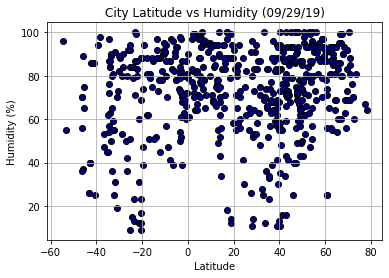

In [268]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Output/Images/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

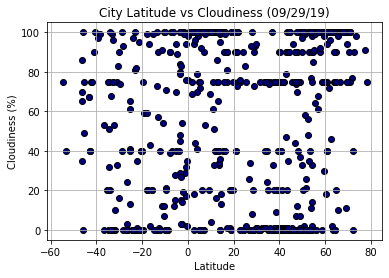

In [269]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Output/Images/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

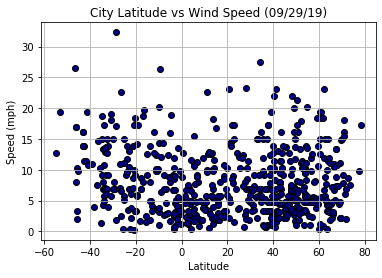

In [270]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Output/Images/wind_speed.png")
plt.show()

In [271]:
# save the dataframe as csv file
weather_df.to_csv("Output/weather.csv", index=False, header=True)


### WeatherPy Analysis

For this project, to create a representative model of weather across world cities, we are trying to see if there is any trend between location and temperature, wind speed, cloudiness, and humidity as we get closer to the equator. Using randomly selected 500+ unique cities around the world based on latitude and longitude information, created plots to visualize the relations. 
We needed to use wide range of cities to get relaible data. 


* Looking at the latitude and maximum temprature plot we can say as cities get closer to the equator, tempratures tend to get higher. So we can conclude that, there is a trend between latitude and temprature as we get closer to the equator.

* For humidity, the plot doesn't show any relation between latitude and humidity. Humidity doesn't get higher or lower as we get closer to the equator. Different latitudes can have similar humidity rates, or similar latidues can have different humidity rates. 

* For cloudiness, again we can't point any relation between latitude and cloudiness as we get closer to the equator. Cities that are closer to the equator don't show any trend like they have any similarity for cloudiness. 

* For wind speed, the plot shows cities that have very diffirent latitudes can have similar wind speeds, and similar latitudes doesn't necessarily have the similar wind speeds. So we can say latitude and wind speed doesn't create a trend. 
